### This notebook shows the performance with input waveforms of different durations. [15s, 30s, 45s, 1min, 2min] with all types of features as an input.

In [3]:
## importing necessary dependencies 
## Note - Some dependencies may be redundant and not really required in this notebook. 
import obspy 
from obspy.geodetics.base import gps2dist_azimuth
from obspy.taup import TauPyModel


import matplotlib.pyplot as plt
import numpy as np
from glob import glob
from tqdm import tqdm
import os
import time
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score
#from tsfresh import extract_features
#from tsfresh.feature_extraction import EfficientFCParameters, MinimalFCParameters
import time


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from time import time

model = TauPyModel(model="iasp91")

In [20]:
## importing station and event metadata



iq_lats = pd.read_csv('icequakes_catalog.csv')['latitude']
iq_lons = pd.read_csv('icequakes_catalog.csv')['longitude']

eq_lats = pd.read_csv('earthquakes_catalog.csv')['latitude']
eq_lons = pd.read_csv('earthquakes_catalog.csv')['longitude']

stns = pd.read_csv('gmap-stations.txt', sep='|', skiprows=[2,6])




stations = stns.values[:,1].astype('str')
stn_lats = stns.values[:,2].astype('float')
stn_lons = stns.values[:,3].astype('float')
gl_lat, gl_lon = 61.219722, -146.895278  ## coordinates of Columbia glacier. 

In [21]:
no_of_icequakes = []
no_of_earthquakes = []
for i in range(15):
    no_of_icequakes.append(len(glob('Data/icequake_waveforms/*'+stations[i]+'*')))
    no_of_earthquakes.append(len(glob('Data/earthquake_waveforms/*'+stations[i]+'*')))
    
    
total_events = np.array(no_of_icequakes)+np.array(no_of_earthquakes)
order = np.argsort(total_events) ## To order the station-wise results according to total number of events recorded

In [18]:
def forest_test(X, Y, n_estimators= 100):
    """"
    This function applies random forest and computes the accuracy
    
    :param X = features matrix
    :param Y = labels matrix
    :param n_estimators = no. of trees in random forests.
    
    """
    
    
    
    X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, 
                                                        test_size = 0.33, 
                                                        random_state = 101)
    #X_train_fs, X_test_fs, fs = select_features(X_Train, Y_Train, X_Test)
    
    trainedforest = RandomForestClassifier(n_estimators=n_estimators).fit(X_Train,Y_Train)
    predictionforest = trainedforest.predict(X_Test)
    #print(confusion_matrix(Y_Test,predictionforest))
    #print(classification_report(Y_Test,predictionforest))
    acc = accuracy_score(Y_Test, predictionforest)
    
    return acc

In [13]:
feature_labels = pd.read_csv('tsfel_features/all/feature_labels.txt', header = None).values

In [17]:
## seeing what files we have in our directory. 
glob('tsfel_features/all/*')

['tsfel_features/all/30s',
 'tsfel_features/all/15s',
 'tsfel_features/all/45s',
 'tsfel_features/all/1min',
 'tsfel_features/all/2min',
 'tsfel_features/all/1minls',
 'tsfel_features/all/feature_labels.txt']

In [22]:
## computing accuracies with different durations. 
acc_15s = []
acc_45s = []
acc_30s = []
acc_1min = []
acc_2min = []


for i in tqdm(range(len(stations))): 
    
    X = np.loadtxt("tsfel_features/all/15s/"+stations[i]+".txt")
    y = np.loadtxt("tsfel_features/all/15s/"+stations[i]+"_labels.txt")
    acc_15s.append(forest_test(X,y))
    

    X = np.loadtxt("tsfel_features/all/30s/"+stations[i]+".txt")
    y = np.loadtxt("tsfel_features/all/30s/"+stations[i]+"_labels.txt")
    acc_30s.append(forest_test(X,y))
    
    
    X = np.loadtxt("tsfel_features/all/45s/"+stations[i]+".txt")
    y = np.loadtxt("tsfel_features/all/45s/"+stations[i]+"_labels.txt")
    acc_45s.append(forest_test(X,y))
    
    
    X = np.loadtxt("tsfel_features/all/1min/"+stations[i]+".txt")
    y = np.loadtxt("tsfel_features/all/1min/"+stations[i]+"_labels.txt")
    acc_1min.append(forest_test(X,y))
    
    
    X = np.loadtxt("tsfel_features/all/2min/"+stations[i]+".txt")
    y = np.loadtxt("tsfel_features/all/2min/"+stations[i]+"_labels.txt")
    acc_2min.append(forest_test(X,y))
  

100%|██████████| 15/15 [02:02<00:00,  8.19s/it]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

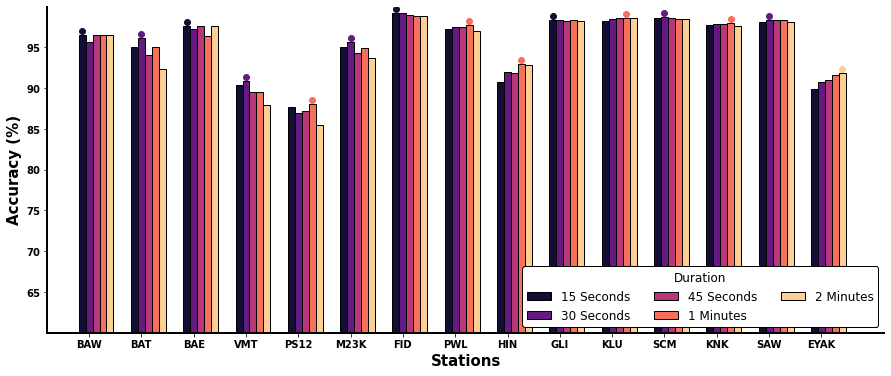

In [30]:
import matplotlib as mpl
cmap = mpl.cm.get_cmap('magma')

import matplotlib as mpl
mpl.rcParams['axes.linewidth'] = 2
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['axes.spines.top'] = False



c1 = cmap(0.1)
c2 = cmap(0.3)
c3 = cmap(0.5)
c4 = cmap(0.7)
c5 = cmap(0.9)
#c6 = cmap(1.0)



# set width of bar
barWidth = 0.2
fig = plt.subplots(figsize =(15, 6), facecolor='white')
 
# set height of bar

a1 = np.array(acc_15s)*100
a2 = np.array(acc_30s)*100
a3 = np.array(acc_45s)*100
a4 = np.array(acc_1min)*100
a5 = np.array(acc_2min)*100




# Set position of bar on X axis
br1 = 1.5*np.arange(len(a1))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]
br6 = [x + barWidth for x in br5]

# Make the plot
plt.bar(br1, a1[order], color =c1, width = barWidth,
        label ='15 Seconds',edgecolor='k')
plt.bar(br2, a2[order], color =c2, width = barWidth,
         label ='30 Seconds',edgecolor='k')
plt.bar(br3, a3[order], color =c3, width = barWidth,
     label ='45 Seconds',edgecolor='k')
plt.bar(br4, a4[order], color =c4, width = barWidth,
         label ='1 Minutes',edgecolor='k')
plt.bar(br5, a5[order], color =c5, width = barWidth,
         label ='2 Minutes',edgecolor='k')
#plt.bar(br6, a6[order], color =c6, width = barWidth,
#         label ='4 Minutes',edgecolor='k')

v = np.vstack((a1[order],a2[order], a3[order], a4[order], a5[order]))
X = [br1, br2, br3, br4, br5]
c= [c1,c2,c3,c4,c5]
for i in range(15):
    plt.scatter(X[int(np.argmax(v[:,i]))][i], max(v[:,i])+0.5, c=c[int(np.argmax(v[:,i]))])



 
# Adding Xticks
plt.xlabel('Stations', fontweight ='bold', fontsize = 15)
plt.ylabel('Accuracy (%)', fontweight ='bold', fontsize = 15)
plt.xticks([1.5*r + barWidth for r in range(len(a1))],stations[order], fontweight='black')
plt.yticks(np.arange(65,100,5), [str(i) for i in np.arange(65,100,5)], fontweight='black' )
plt.ylim(60,100)
plt.xlim(-1,23)
plt.legend(loc='lower right',ncol=3, facecolor='white', framealpha=1, edgecolor='black', fontsize=12, title ='Duration', title_fontsize=12)
#plt.savefig('Manuscript_Figures/Duration_Performance_Comparison.eps')